In [792]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
%load_ext google.colab.data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [793]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

In [794]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 9/volaille2017.csv', index_col=0)
# index_col=0 supprime l'apparition de la colonne unnamed_0 du a un problème de header

In [795]:
df


,Zone,Quantite_exporte_de_france,Stabilite_politique,PIB_2017_euro,Dispo_alim(Kg/Pers/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture_total,Production,Distance_france,Droit de douane,tva
0,Afghanistan,0.0,-2.80,498.34,1.53,57000.0,0.0,29000.0,55000.0,28000.0,5590.3810,7.02,0.0
1,Afrique du Sud,0.0,-0.28,6330.41,35.69,2118000.0,63000.0,514000.0,2035000.0,1667000.0,9353.5520,4.51,15.0
2,Albanie,440.0,0.38,4259.17,16.36,47000.0,0.0,38000.0,47000.0,13000.0,1603.5340,0.85,20.0
3,Algérie,51470.0,-0.92,3886.84,6.38,277000.0,0.0,2000.0,264000.0,275000.0,1340.3900,8.85,19.0
4,Allemagne,1313490.0,0.59,41973.43,19.47,1739000.0,646000.0,842000.0,1609000.0,1514000.0,439.8984,1.79,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Émirats arabes unis,0.0,0.62,40480.13,43.47,412000.0,94000.0,433000.0,412000.0,48000.0,5249.5350,2.82,5.0
167,Équateur,0.0,-0.07,5871.62,19.31,341000.0,0.0,0.0,324000.0,340000.0,9367.0980,6.81,12.0
168,États-Unis d'Amérique,0.0,0.34,56313.29,55.68,18266000.0,3692000.0,123000.0,18100000.0,21914000.0,5838.1570,1.66,10.5
169,Éthiopie,0.0,-1.68,710.41,0.13,14000.0,0.0,1000.0,14000.0,14000.0,5582.5020,9.96,15.0


In [796]:
#renommage de la colonne tonnage exporte pour quelle soit plus explicite
df.rename(columns={'tonnage exporte':'tonnage exporte de France'}, inplace = True)

In [797]:
df.shape

(171, 13)

In [798]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Zone                        171 non-null    object 
 1   Quantite_exporte_de_france  171 non-null    float64
 2   Stabilite_politique         171 non-null    float64
 3   PIB_2017_euro               171 non-null    float64
 4   Dispo_alim(Kg/Pers/an)      171 non-null    float64
 5   Disponibilité intérieure    171 non-null    float64
 6   Exportations - Quantité     171 non-null    float64
 7   Importations - Quantité     171 non-null    float64
 8   Nourriture_total            171 non-null    float64
 9   Production                  171 non-null    float64
 10  Distance_france             171 non-null    float64
 11  Droit de douane             171 non-null    float64
 12  tva                         171 non-null    float64
dtypes: float64(12), object(1)
memory us

In [799]:
df.isna().mean()

Zone                          0.0
Quantite_exporte_de_france    0.0
Stabilite_politique           0.0
PIB_2017_euro                 0.0
Dispo_alim(Kg/Pers/an)        0.0
Disponibilité intérieure      0.0
Exportations - Quantité       0.0
Importations - Quantité       0.0
Nourriture_total              0.0
Production                    0.0
Distance_france               0.0
Droit de douane               0.0
tva                           0.0
dtype: float64

In [800]:
df.duplicated().sum()

0

In [801]:
df.nunique()

Zone                          171
Quantite_exporte_de_france     62
Stabilite_politique           135
PIB_2017_euro                 171
Dispo_alim(Kg/Pers/an)        168
Disponibilité intérieure      135
Exportations - Quantité        50
Importations - Quantité        84
Nourriture_total              130
Production                    124
Distance_france               170
Droit de douane               135
tva                            31
dtype: int64

In [802]:
df = df.set_index('Zone')

In [803]:
X = df.values
X[:5]

array([[ 0.000000e+00, -2.800000e+00,  4.983400e+02,  1.530000e+00,
         5.700000e+04,  0.000000e+00,  2.900000e+04,  5.500000e+04,
         2.800000e+04,  5.590381e+03,  7.020000e+00,  0.000000e+00],
       [ 0.000000e+00, -2.800000e-01,  6.330410e+03,  3.569000e+01,
         2.118000e+06,  6.300000e+04,  5.140000e+05,  2.035000e+06,
         1.667000e+06,  9.353552e+03,  4.510000e+00,  1.500000e+01],
       [ 4.400000e+02,  3.800000e-01,  4.259170e+03,  1.636000e+01,
         4.700000e+04,  0.000000e+00,  3.800000e+04,  4.700000e+04,
         1.300000e+04,  1.603534e+03,  8.500000e-01,  2.000000e+01],
       [ 5.147000e+04, -9.200000e-01,  3.886840e+03,  6.380000e+00,
         2.770000e+05,  0.000000e+00,  2.000000e+03,  2.640000e+05,
         2.750000e+05,  1.340390e+03,  8.850000e+00,  1.900000e+01],
       [ 1.313490e+06,  5.900000e-01,  4.197343e+04,  1.947000e+01,
         1.739000e+06,  6.460000e+05,  8.420000e+05,  1.609000e+06,
         1.514000e+06,  4.398984e+02,  1.790

suppression de \xa0 des donnés

In [804]:
X.shape

(171, 12)

In [805]:
names = df.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=171)

In [806]:
features = df.columns
features

Index(['Quantite_exporte_de_france', 'Stabilite_politique', 'PIB_2017_euro',
       'Dispo_alim(Kg/Pers/an)', 'Disponibilité intérieure',
       'Exportations - Quantité', 'Importations - Quantité',
       'Nourriture_total', 'Production', 'Distance_france', 'Droit de douane',
       'tva'],
      dtype='object')

In [807]:
scaler = StandardScaler()

In [808]:
scaler.fit(X)

StandardScaler()

In [809]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.1052124 , -3.0662061 , -0.7093299 , -1.17776742, -0.2875334 ,
        -0.22780093, -0.31866902, -0.28100467, -0.27653761, -0.11928357,
         0.24742916, -3.06674467],
       [-0.1052124 , -0.24522841, -0.38259058,  0.99331314,  0.65992753,
        -0.09024701,  2.29184214,  0.65080632,  0.38596554,  0.8356123 ,
        -0.33621049, -0.18888414],
       [-0.10513756,  0.49359909, -0.49863095, -0.23522864, -0.29213049,
        -0.22780093, -0.27022654, -0.28476956, -0.28260078, -1.13093669,
        -1.18725475,  0.7704027 ],
       [-0.09645762, -0.96166718, -0.51949058, -0.86951974, -0.18639735,
        -0.22780093, -0.46399644, -0.18264684, -0.17669729, -1.19770887,
         0.67295129,  0.57854533],
       [ 0.11820558,  0.72868056,  1.61429491, -0.03756879,  0.48569769,
         1.18267254,  4.05730124,  0.45032578,  0.32412114, -1.42620651,
        -0.96868054,  0.57854533]])

In [810]:
X_scaled = scaler.fit_transform(X)

In [811]:
#vérification que les moyennes sont bien à0 et les ecartype à 1
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10,11
mean,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [812]:
n_components = 11

In [813]:
pca = PCA(n_components=n_components)

In [814]:
pca.fit(X_scaled)

PCA(n_components=11)

In [815]:
pca.explained_variance_ratio_

array([3.19470513e-01, 1.83185613e-01, 1.30997336e-01, 9.15776893e-02,
       7.49569541e-02, 5.84111777e-02, 4.75766711e-02, 4.14145274e-02,
       2.73060209e-02, 2.49520307e-02, 1.17594328e-04])

In [816]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([3.195e+01, 1.832e+01, 1.310e+01, 9.160e+00, 7.500e+00, 5.840e+00,
       4.760e+00, 4.140e+00, 2.730e+00, 2.500e+00, 1.000e-02])

In [817]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 32.,  50.,  63.,  73.,  80.,  86.,  91.,  95.,  98., 100., 100.])

In [818]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

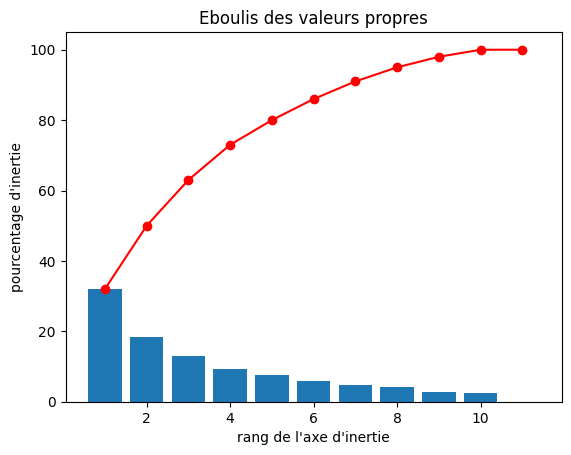

In [819]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

L'éboulis des valeurs propres montre que 6 composantes principales expliquent 86% de l'inertie

In [820]:
pcs = pca.components_

In [821]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.047657,0.067457,0.170070,0.183901,0.480638,0.420060,0.188546,0.482515,0.487985,-0.005976,-0.116810,0.052838
1,-0.199748,-0.494233,-0.518523,-0.293777,0.182953,0.036198,-0.197228,0.181249,0.179301,0.198342,0.401000,-0.147789
2,0.272728,-0.276925,-0.048314,-0.404850,-0.004506,0.112979,-0.026567,-0.004561,0.016889,-0.620968,-0.090797,0.524454
3,0.467206,-0.257666,-0.009015,-0.220657,0.000018,-0.089057,0.633867,-0.002258,-0.060368,0.018467,-0.101030,-0.492584
4,0.740625,0.154945,-0.063938,0.154666,-0.073940,0.239445,-0.236919,-0.069491,-0.007831,0.256621,0.440431,0.125703
5,-0.196502,-0.065130,-0.008970,0.409489,-0.023355,-0.089686,0.502662,-0.018061,-0.072511,-0.290104,0.632477,0.195842
6,-0.014115,0.041719,0.526991,-0.180944,0.045363,-0.010385,-0.342863,0.056384,0.059474,-0.412881,0.371847,-0.502416
7,-0.081306,0.509188,0.117289,-0.628591,0.113863,-0.213215,0.247641,0.102044,0.048216,0.254507,0.263090,0.242393
8,0.238783,0.279875,-0.385145,0.193081,0.257986,-0.647600,-0.153164,0.239409,0.113571,-0.292819,-0.074607,-0.090057
9,0.119109,-0.490410,0.505779,0.102518,0.137638,-0.499118,-0.094702,0.114991,0.031115,0.321868,0.001530,0.290113


In [822]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Quantite_exporte_de_france,Stabilite_politique,PIB_2017_euro,Dispo_alim(Kg/Pers/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture_total,Production,Distance_france,Droit de douane,tva
F1,0.05,0.07,0.17,0.18,0.48,0.42,0.19,0.48,0.49,-0.01,-0.12,0.05
F2,-0.20,-0.49,-0.52,-0.29,0.18,0.04,-0.20,0.18,0.18,0.20,0.40,-0.15
F3,0.27,-0.28,-0.05,-0.40,-0.00,0.11,-0.03,-0.00,0.02,-0.62,-0.09,0.52
F4,0.47,-0.26,-0.01,-0.22,0.00,-0.09,0.63,-0.00,-0.06,0.02,-0.10,-0.49
F5,0.74,0.15,-0.06,0.15,-0.07,0.24,-0.24,-0.07,-0.01,0.26,0.44,0.13
F6,-0.20,-0.07,-0.01,0.41,-0.02,-0.09,0.50,-0.02,-0.07,-0.29,0.63,0.20
F7,-0.01,0.04,0.53,-0.18,0.05,-0.01,-0.34,0.06,0.06,-0.41,0.37,-0.50
F8,-0.08,0.51,0.12,-0.63,0.11,-0.21,0.25,0.10,0.05,0.25,0.26,0.24
F9,0.24,0.28,-0.39,0.19,0.26,-0.65,-0.15,0.24,0.11,-0.29,-0.07,-0.09
F10,0.12,-0.49,0.51,0.10,0.14,-0.50,-0.09,0.11,0.03,0.32,0.00,0.29


In [823]:
#on transpose le données
pcs.T.round(2)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11
Quantite_exporte_de_france,0.05,-0.20,0.27,0.47,0.74,-0.20,-0.01,-0.08,0.24,0.12,-0.00
Stabilite_politique,0.07,-0.49,-0.28,-0.26,0.15,-0.07,0.04,0.51,0.28,-0.49,-0.00
PIB_2017_euro,0.17,-0.52,-0.05,-0.01,-0.06,-0.01,0.53,0.12,-0.39,0.51,0.00
Dispo_alim(Kg/Pers/an),0.18,-0.29,-0.40,-0.22,0.15,0.41,-0.18,-0.63,0.19,0.10,0.00
Disponibilité intérieure,0.48,0.18,-0.00,0.00,-0.07,-0.02,0.05,0.11,0.26,0.14,0.34
Exportations - Quantité,0.42,0.04,0.11,-0.09,0.24,-0.09,-0.01,-0.21,-0.65,-0.50,-0.07
Importations - Quantité,0.19,-0.20,-0.03,0.63,-0.24,0.50,-0.34,0.25,-0.15,-0.09,0.03
Nourriture_total,0.48,0.18,-0.00,-0.00,-0.07,-0.02,0.06,0.10,0.24,0.11,-0.79
Production,0.49,0.18,0.02,-0.06,-0.01,-0.07,0.06,0.05,0.11,0.03,0.50
Distance_france,-0.01,0.20,-0.62,0.02,0.26,-0.29,-0.41,0.25,-0.29,0.32,-0.01


<Axes: >

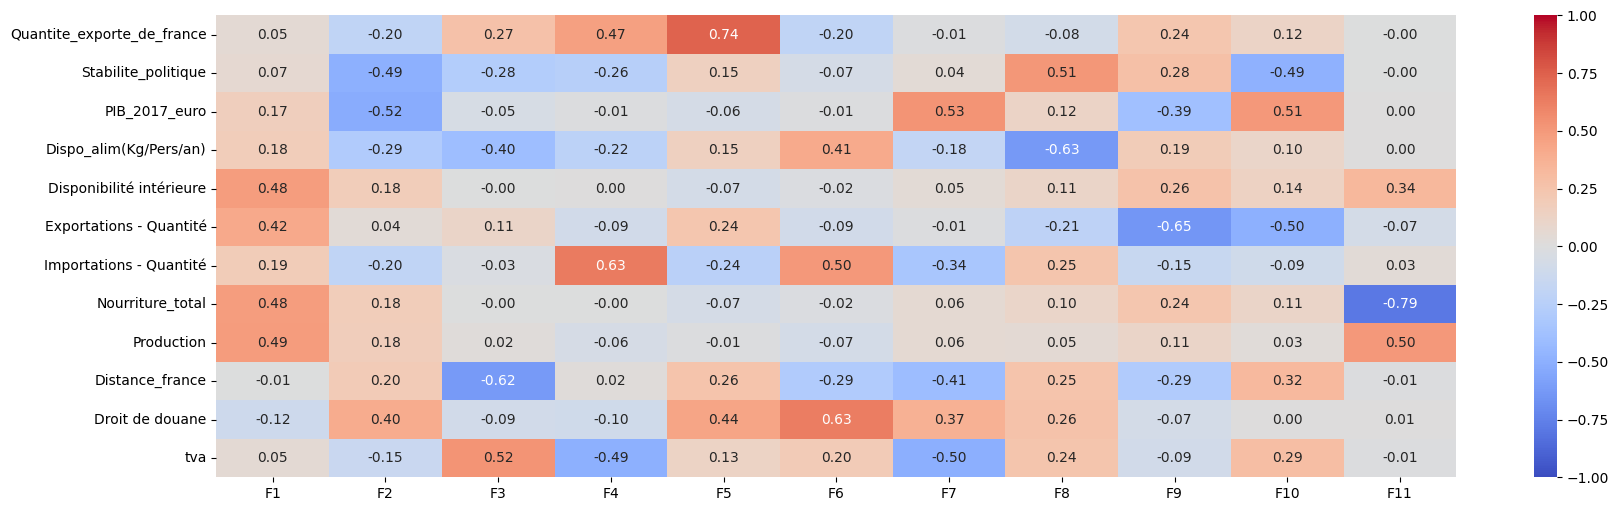

In [824]:
# Affichage du heatmap des correlations
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

Fonction permettant de tracer les cercles de correlation

In [825]:
def correlation_graph(pca,
                      x_y,
                      features) :# code repris du cours d'Openclassroom
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.02,
                head_length=0.02,
                width=0.01, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.02,
                pca.components_[y, i] + 0.02,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [826]:
#projetion des données sur les axes principaux de l'ACP
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-1.30381777e+00,  2.68051699e+00, -2.44618603e-01,
         2.32622559e+00, -9.33051319e-01, -7.72951800e-01,
         1.46119623e+00, -1.70929465e+00, -5.21365747e-01,
         1.47326053e-01,  1.63283969e-02],
       [ 1.33410987e+00, -3.97665290e-02, -1.00237295e+00,
         1.37674243e+00, -5.56845530e-01,  1.05973956e+00,
        -1.46049593e+00,  3.98154961e-02,  1.20109050e-01,
         2.35380505e-01, -2.24432742e-02],
       [-4.75986454e-01, -8.20234868e-01,  1.14735954e+00,
        -5.33632452e-01, -6.69092624e-01, -4.58228764e-01,
        -5.10830912e-01, -1.58481699e-01,  6.23300625e-01,
        -6.15682040e-01, -1.20549781e-02],
       [-8.05724205e-01,  9.50539636e-01,  1.58846349e+00,
        -2.38565477e-01, -1.76715566e-01,  4.24240192e-01,
         4.31075634e-01, -9.84437702e-02,  9.51240101e-02,
        -2.91310864e-03,  1.44583539e-03],
       [ 2.34534574e+00, -2.49538998e+00,  1.07172477e+00,
         2.09364332e+00, -1.37629213e+00,  1.70423391e+00,
  

Fonction permettant d'afficher les plans factoriels

In [827]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):# code repris d'openclassroom
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



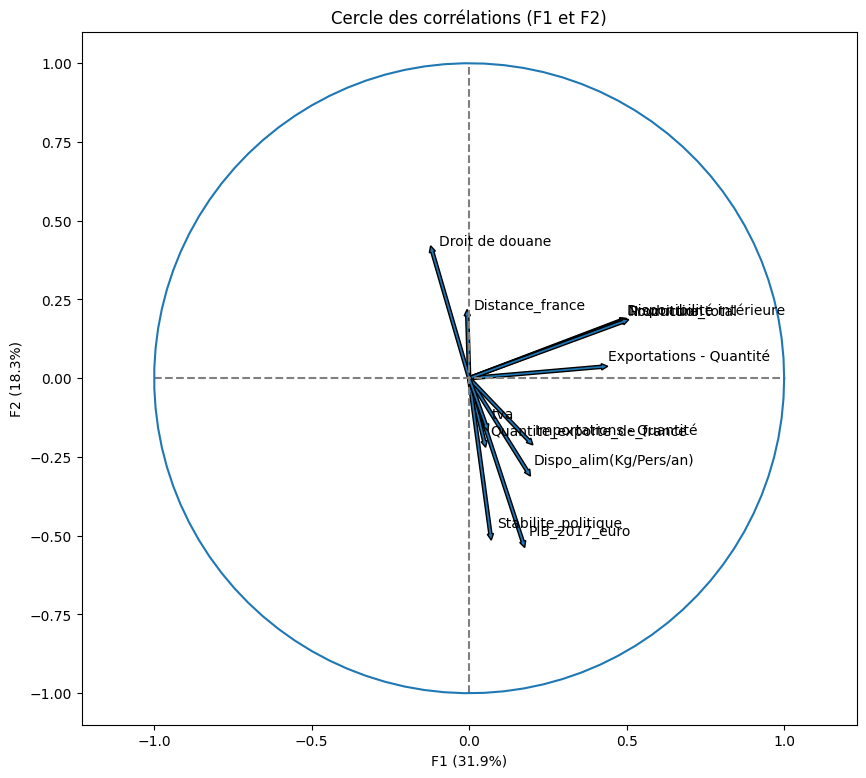

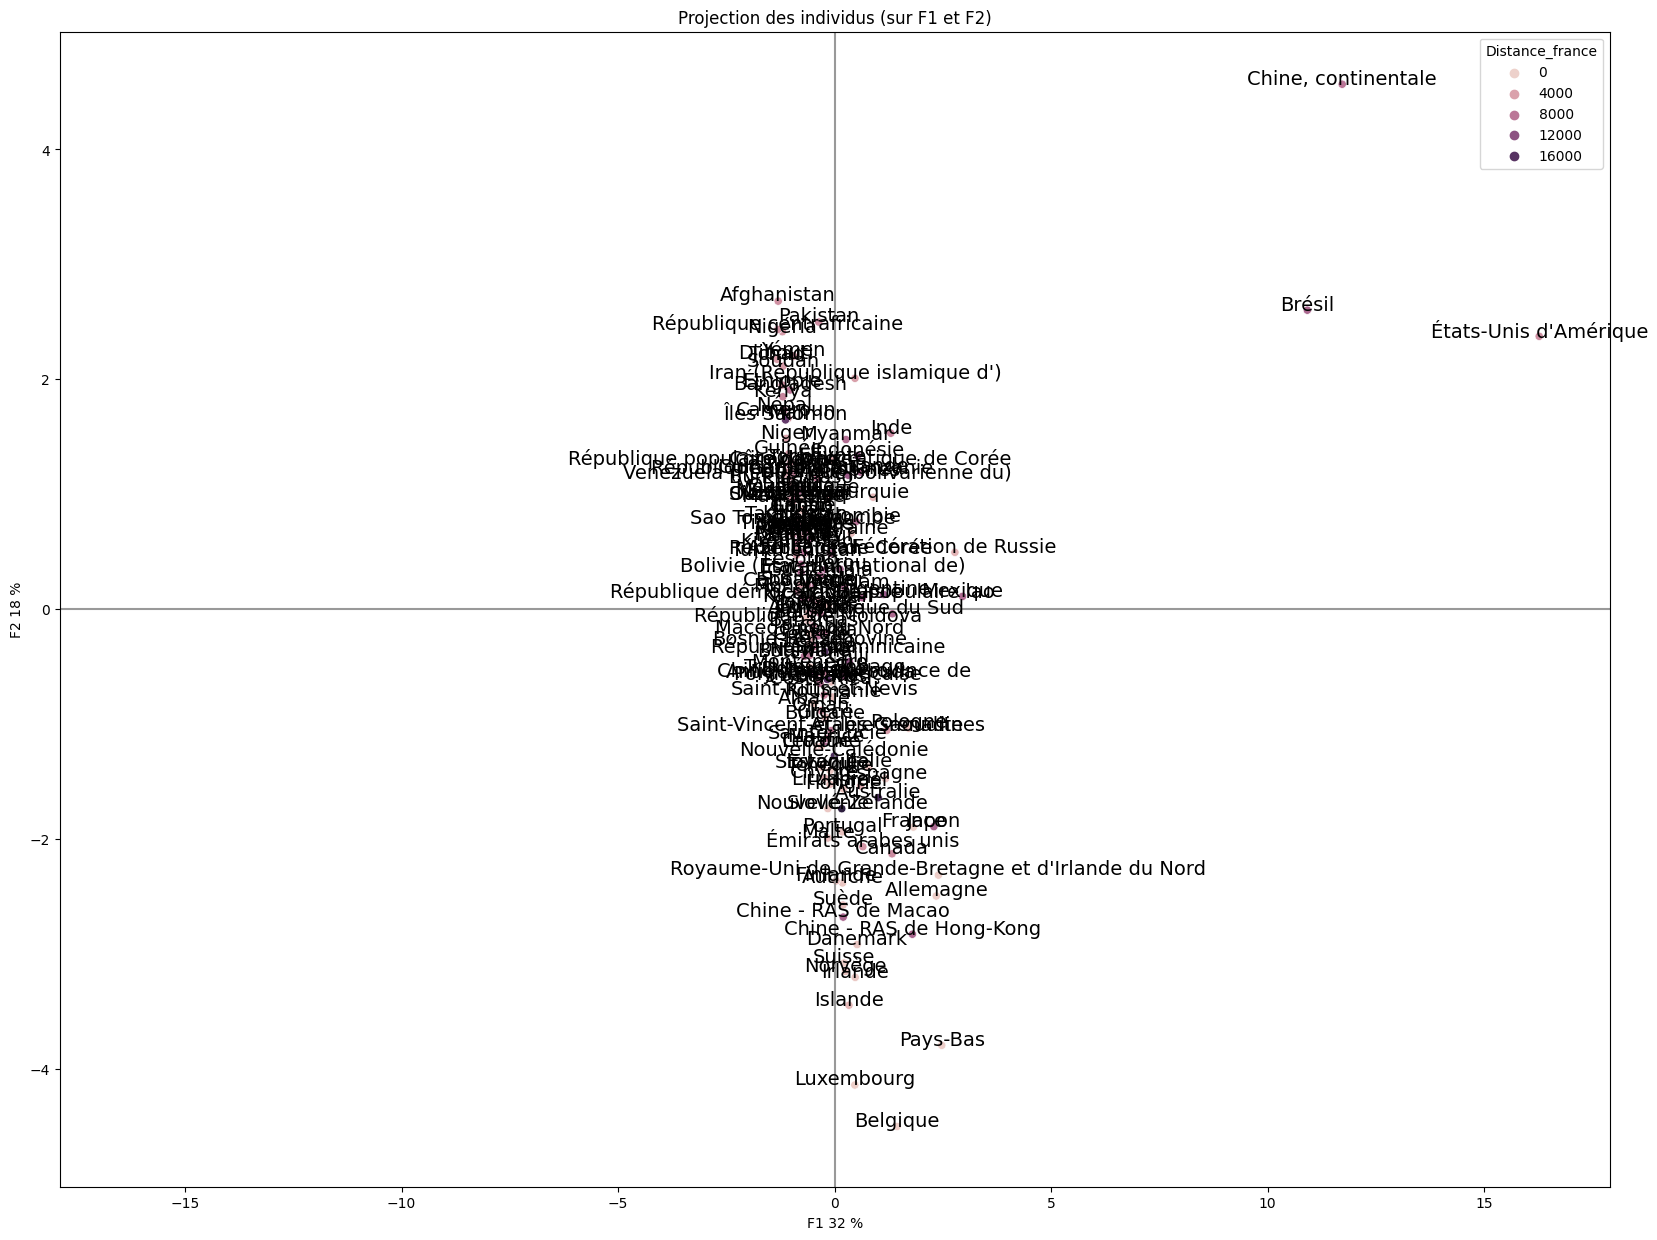

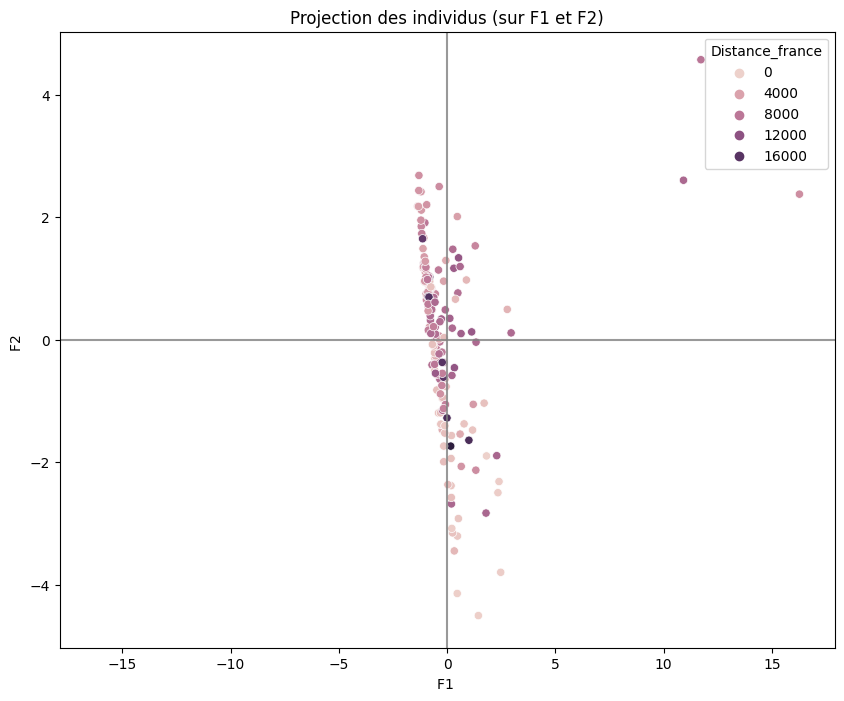

In [828]:
x_y = [0,1] #F1 et F2
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'], marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])


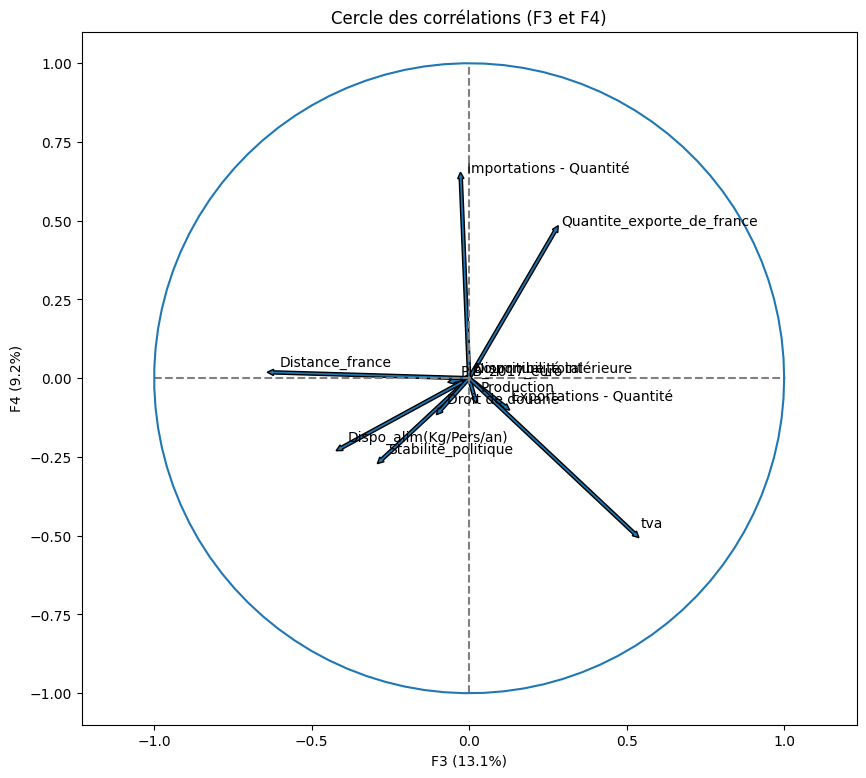

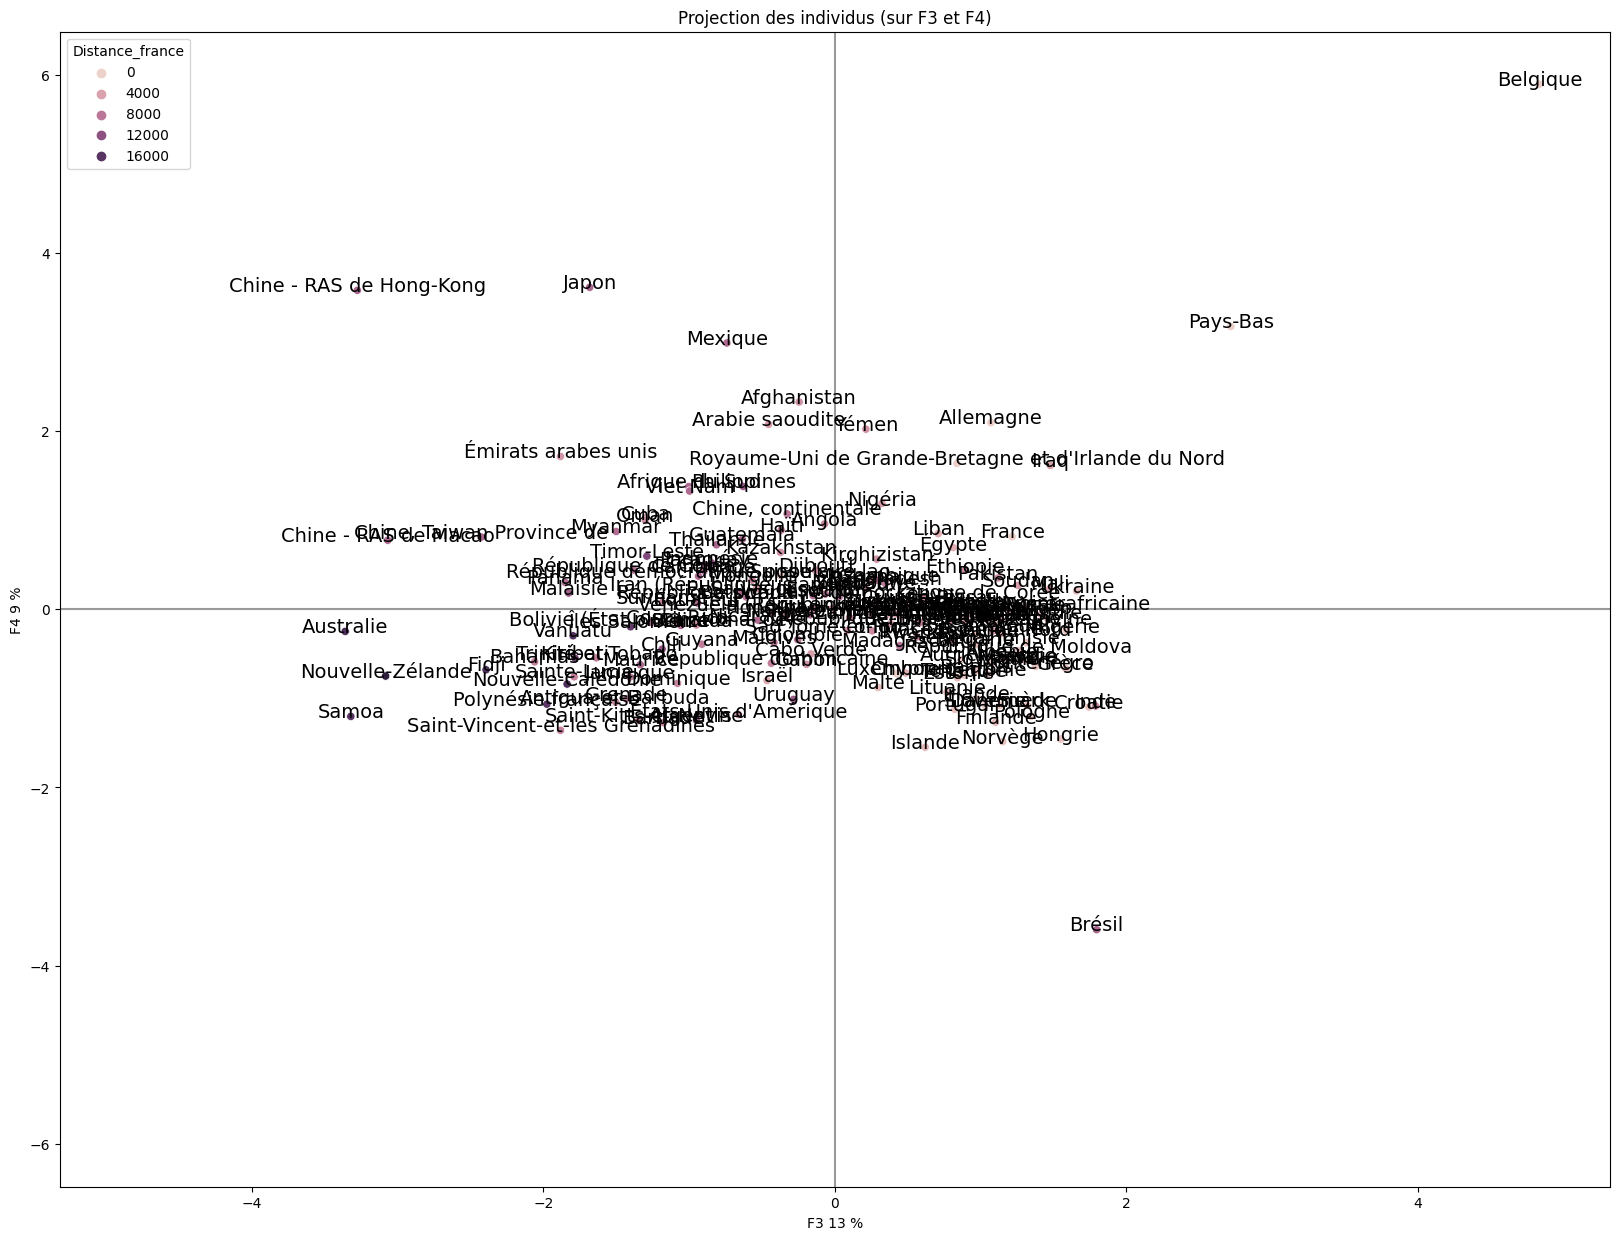

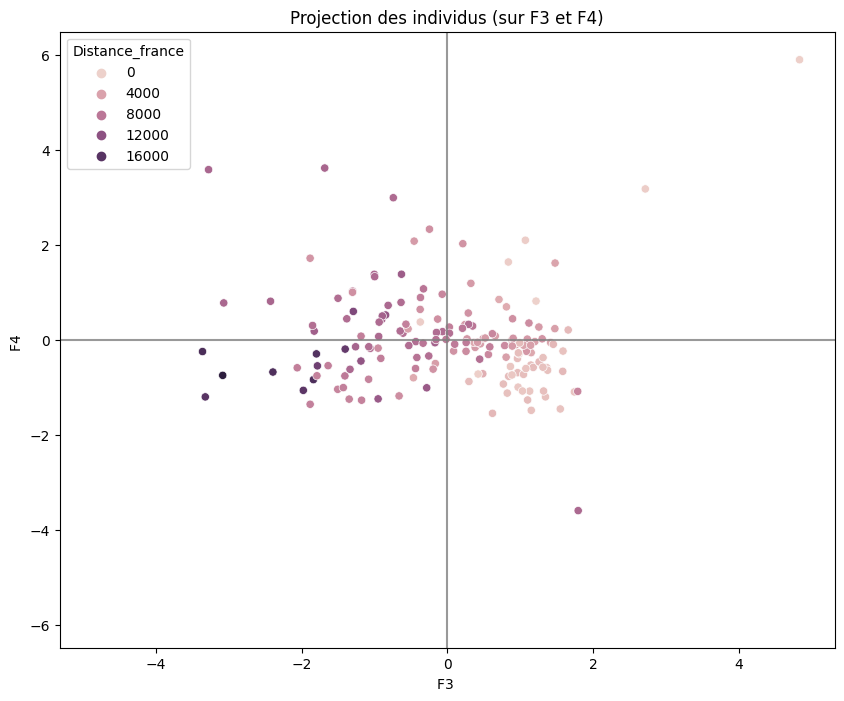

In [829]:
x_y = 2,3 #F3 et F4
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'],marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])


In [830]:
x_y = (4,5) # on veut le cercle de correlation entre F5 et F6
x_y

(4, 5)

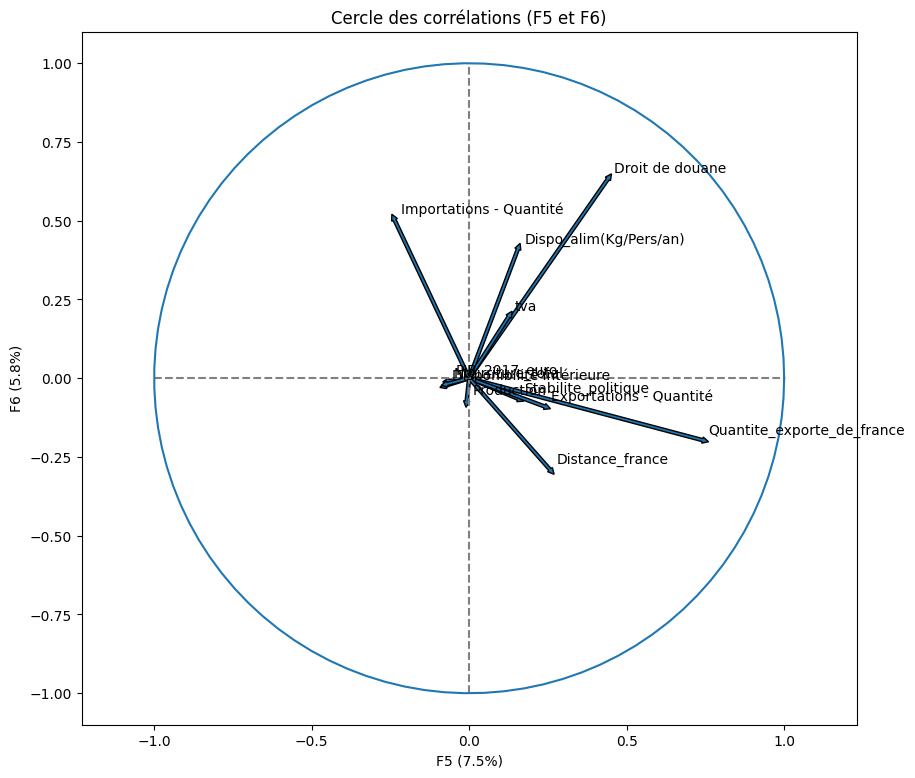

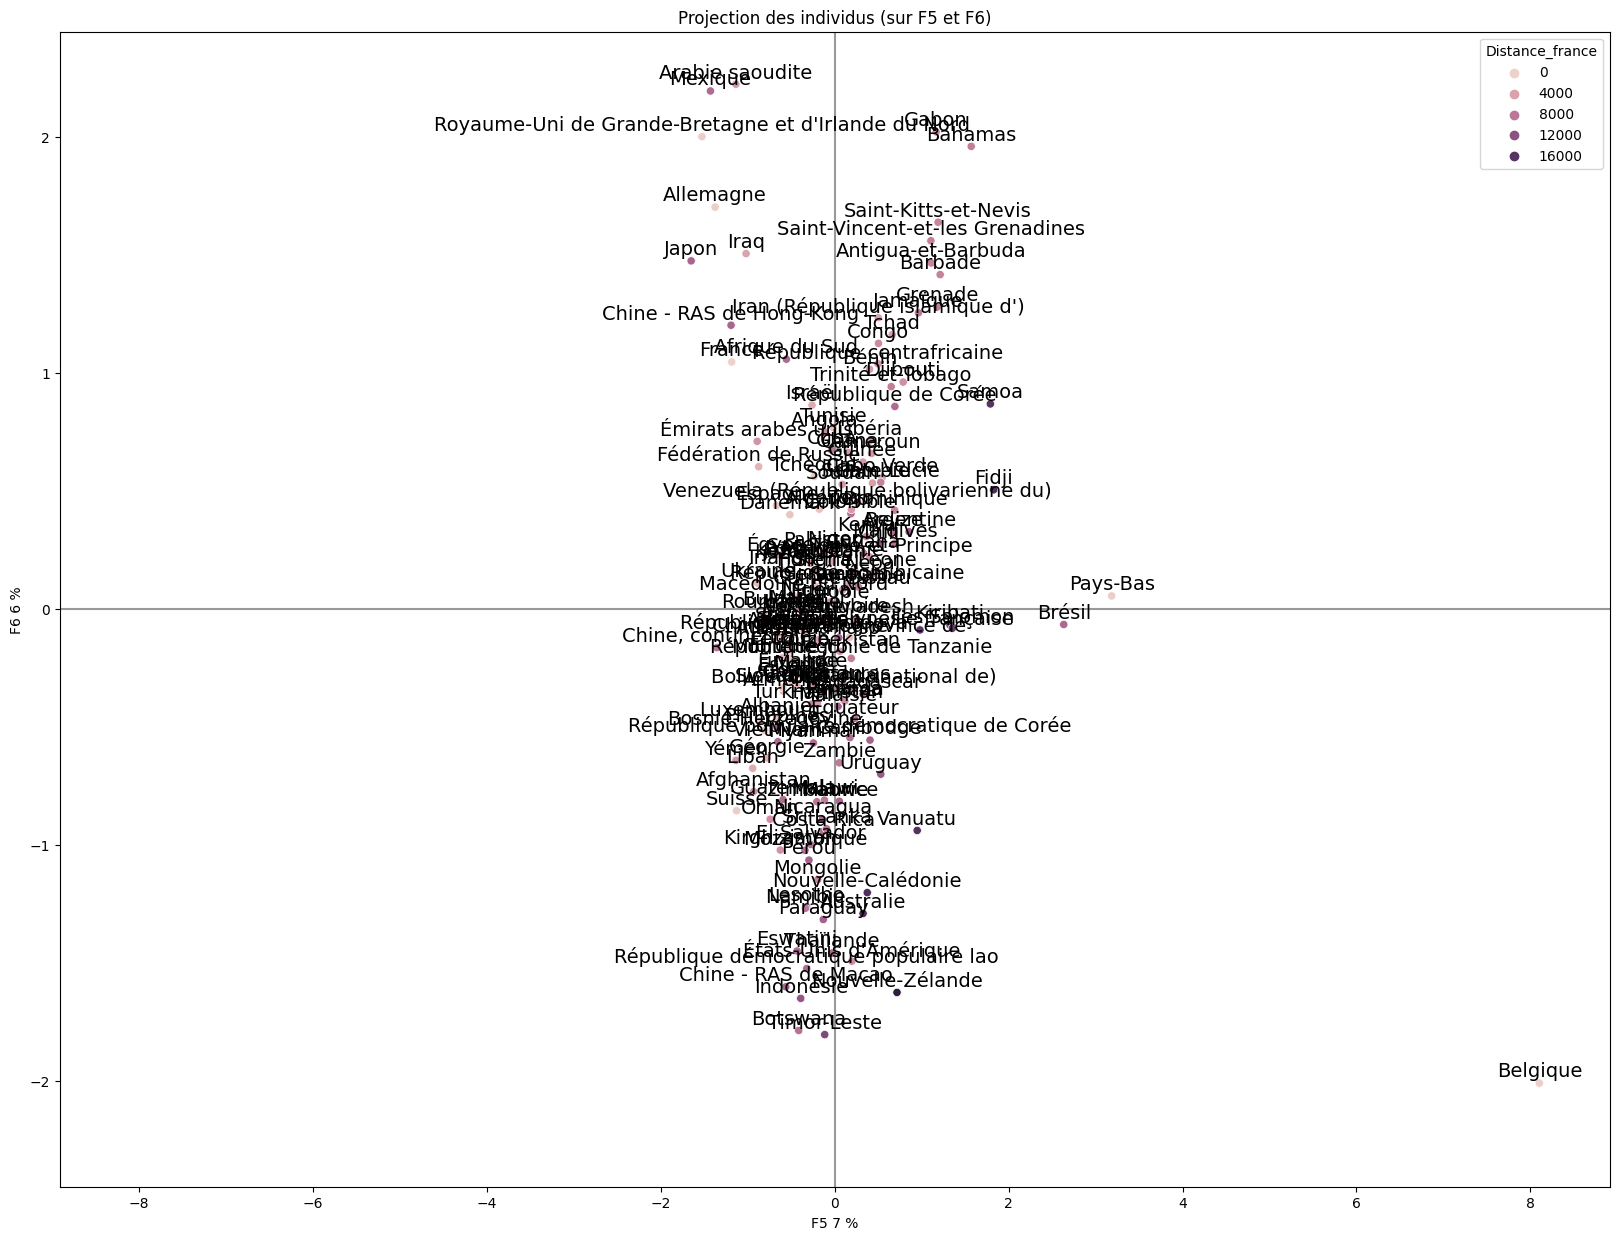

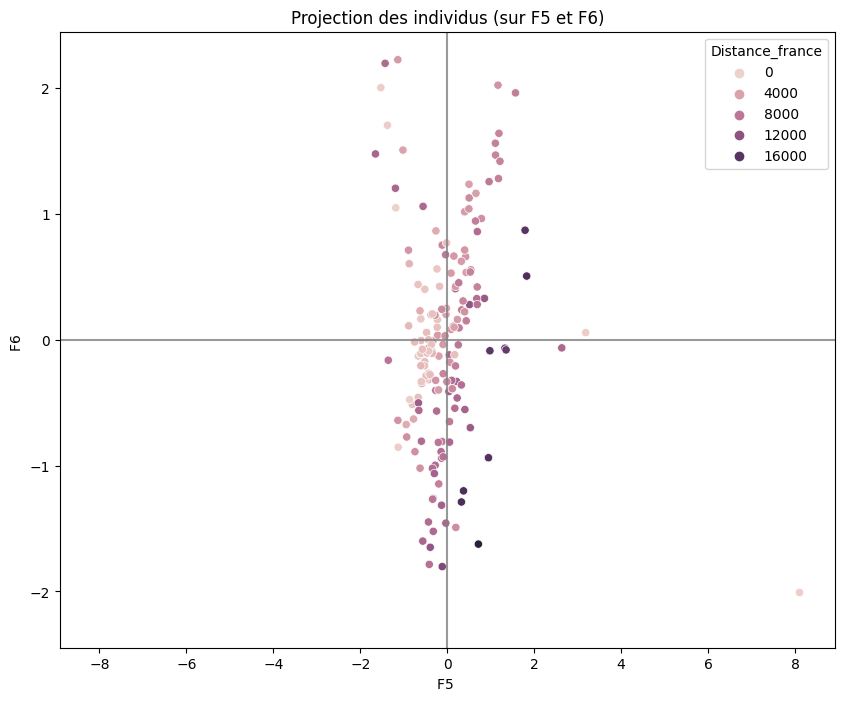

In [831]:
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'],marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])


Identification des axes principaux d'inertie:
- **F1** représente le niveau de sécurité alimentaire d’un pays
- **F2** représente le niveau de protectionnisme d’un pays (marqué par le niveau des droits de douane) et de son économie (marqués par la stabilité » politique et le PIB)
- **F3** représente la fiscalité et le commerce international d’un pays
- **F4** représente l’importance du commerce international du pays avec la France marqué par importation-quantité et Quantité exporté de France.
- **F5** représente les pays qui font du protectionnisme et qui font peu d’importations mais qui les font principalement avec la France
- **F6** représente le pays qui font du protectionnisme, des importations mais très peu avec la France

In [832]:
ranking_F1 = sorted(zip(names, X_proj[:, 0]), key=lambda x: x[1], reverse=True)
ranking_F2 = sorted(zip(names, X_proj[:, 1]), key=lambda x: x[1], reverse=True)
ranking_F3 = sorted(zip(names, X_proj[:, 2]), key=lambda x: x[1], reverse=True)
ranking_F4 = sorted(zip(names, X_proj[:, 3]), key=lambda x: x[1], reverse=True)
ranking_F5 = sorted(zip(names, X_proj[:, 4]), key=lambda x: x[1], reverse=True)
ranking_F6 = sorted(zip(names, X_proj[:, 5]), key=lambda x: x[1], reverse=True)

In [833]:
def create_ranking_df(ranking, col_name):
    df_ranking = pd.DataFrame(ranking, columns=['Pays', col_name])
    df_ranking['Position_' + col_name] = df_ranking[col_name].rank(ascending=False)
    return df_ranking

# Création des DataFrames de classement avec position
df_F1 = create_ranking_df(ranking_F1, 'Classement_F1')
df_F2 = create_ranking_df(ranking_F2, 'Classement_F2')
df_F3 = create_ranking_df(ranking_F3, 'Classement_F3')
df_F4 = create_ranking_df(ranking_F4, 'Classement_F4')
df_F5 = create_ranking_df(ranking_F5, 'Classement_F5')
df_F6 = create_ranking_df(ranking_F6, 'Classement_F6')

In [834]:
df_F1 = pd.DataFrame(ranking_F1, columns=['Pays', 'Classement_F1'])
df_F2 = pd.DataFrame(ranking_F2, columns=['Pays', 'Classement_F2'])
df_F3 = pd.DataFrame(ranking_F3, columns=['Pays', 'Classement_F3'])
df_F4 = pd.DataFrame(ranking_F4, columns=['Pays', 'Classement_F4'])
df_F5 = pd.DataFrame(ranking_F5, columns=['Pays', 'Classement_F5'])
df_F6 = pd.DataFrame(ranking_F6, columns=['Pays', 'Classement_F6'])
# Fusion des DataFrames en fonction du nom des pays
df_classements = pd.merge(df_F1, df_F2, on='Pays').merge(df_F3, on='Pays').merge(df_F4, on='Pays').merge(df_F5, on='Pays').merge(df_F6, on='Pays')

# Affichage du DataFrame résultant
df_classements

,Pays,Classement_F1,Classement_F2,Classement_F3,Classement_F4,Classement_F5,Classement_F6
0,États-Unis d'Amérique,16.269157,2.374646,-0.661523,-1.182578,0.196349,-1.491646
1,"Chine, continentale",11.720133,4.567762,-0.326614,1.070505,-1.357162,-0.162886
2,Brésil,10.914961,2.601884,1.796804,-3.596074,2.633504,-0.064732
3,Mexique,2.953663,0.111834,-0.740747,2.987961,-1.429786,2.196411
4,Fédération de Russie,2.776763,0.494764,0.885823,-0.001817,-0.875289,0.603955
...,...,...,...,...,...,...,...
166,Éthiopie,-1.211355,1.950858,0.896191,0.440861,-0.052423,0.030875
167,Afghanistan,-1.303818,2.680517,-0.244619,2.326226,-0.933051,-0.772952
168,République centrafricaine,-1.309436,2.434493,1.302261,0.018734,0.497016,1.040099
169,Tchad,-1.325106,2.174417,1.144232,-0.115963,0.660132,1.163327


In [835]:
# Remplacer chaque valeur des colonnes 1 à 6 par son indice de classement dans la colonne
for i in range(1, 7):
    df_classements[f'Classement_F{i}'] = df_classements[f'Classement_F{i}'].rank(method='min', ascending=False)

classement=pd.DataFrame(df_classements)
classement

,Pays,Classement_F1,Classement_F2,Classement_F3,Classement_F4,Classement_F5,Classement_F6
0,États-Unis d'Amérique,1.0,7.0,122.0,160.0,53.0,164.0
1,"Chine, continentale",2.0,1.0,105.0,17.0,167.0,103.0
2,Brésil,3.0,3.0,3.0,171.0,3.0,87.0
3,Mexique,4.0,90.0,123.0,5.0,169.0,2.0
4,Fédération de Russie,5.0,74.0,54.0,71.0,156.0,36.0
...,...,...,...,...,...,...,...
166,Éthiopie,167.0,13.0,50.0,35.0,78.0,77.0
167,Afghanistan,168.0,2.0,102.0,6.0,159.0,141.0
168,République centrafricaine,169.0,5.0,20.0,66.0,33.0,21.0
169,Tchad,170.0,10.0,29.0,88.0,25.0,17.0


# Kmeans

In [836]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

on test d'abord avec 6 clusters et on va travailer sur une copy appelé X de df

In [837]:
X = df.copy()

In [838]:
#on entraine le model
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [839]:
#on peut calculer son inertie (somme des carrés des distances entre chaque point)
kmeans.inertia_

94369666371597.95

l'inertie étant très élevés, il semble que les points au point de chaque cluster sont dispersés sur de grande distances par rapport à leur centree

Evaluation du nombre de cluster par la méthode du coude

In [840]:
#on creer une liste vide pour enregistrer les inerties
inertia = []

In [841]:
# k=list : notre liste du nombre de cluster
k_list = range(1, 11)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [842]:
#pour chaque nombre de cluster, on instancie un k_means pour k clusters puis on entraine le model et on enregistre l'inertie obtenue dans inertia
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)
  centroids  = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [843]:
inertia

[8580021941781298.0,
 3591955711534389.0,
 1232436765578269.8,
 408190731835117.94,
 206348861735452.62,
 94369666371597.95,
 49270802595039.73,
 37422081531736.95,
 26825417147559.79,
 22102118934355.68]

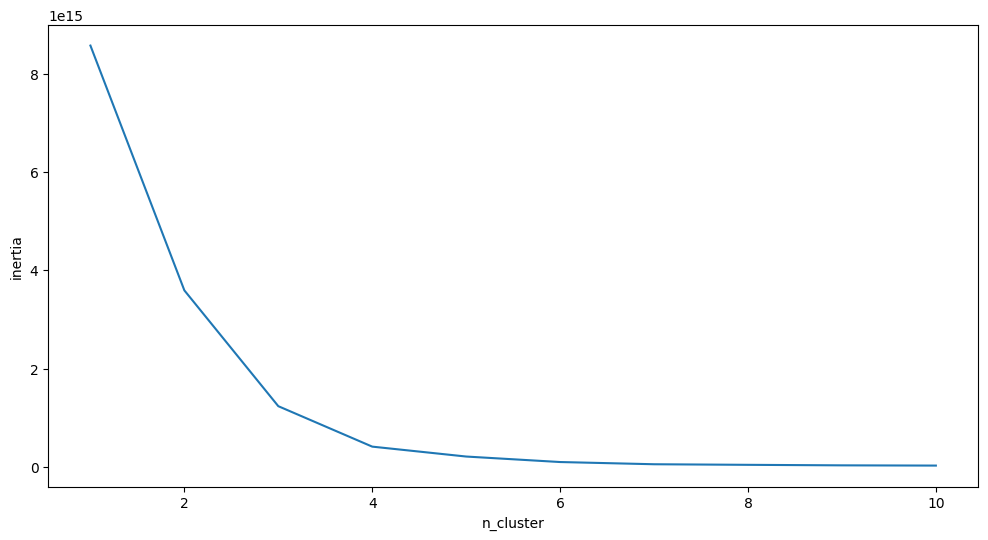

In [844]:
# affichage du graphique des inerties pour constater la cassure de la courbe
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("inertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, inertia)

In [845]:
#print("Dimensions des données:", X.shape)
#print("Dimensions des centroids:", centroids.shape)

La méthode du coude semble indiquer qu'il faut prendre 3 ou 4 clusters. Vérifions cette indication par une autre méthode

In [846]:
#utilisation de la librairie kneed pour calculer le nombre de cluster
%pip install kneed
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")

print(f'Nombre de cluster : {kl.elbow}')


Nombre de cluster : 3


L'utilisation de la librairie kneed qui permet d'identifier le point de coude d'une ligne ajustée aux données indique un nombre de cluster de 3

Evaluation du nombre de cluster par la méthode de la silhouette

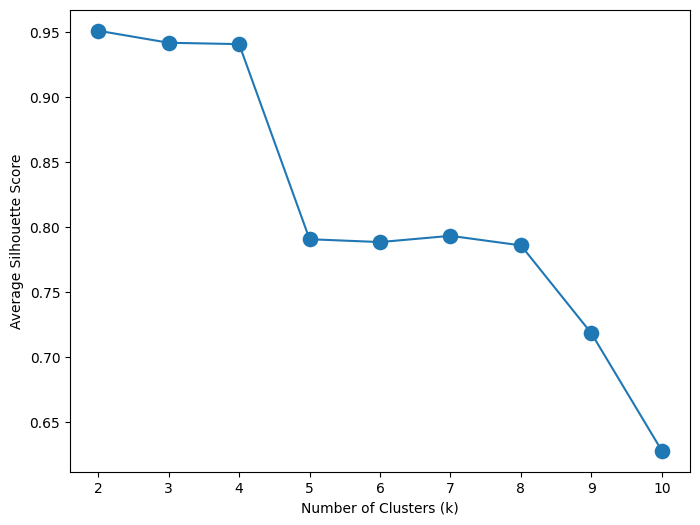

In [847]:
#The Average Silhouette Score
from sklearn.metrics import silhouette_score

silhouette = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(X)
    silhouette.append(silhouette_score(X, km.labels_))

silhouette_series = pd.Series(silhouette, index=range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y=silhouette_series, x=silhouette_series.index)
ax = sns.scatterplot(y=silhouette_series, x=silhouette_series.index, s=150)
ax = ax.set(xlabel='Number of Clusters (k)', ylabel='Average Silhouette Score')

plt.show()

In [848]:
silhouette_series

2     0.950797
3     0.941546
4     0.940498
5     0.790568
6     0.788377
7     0.793172
8     0.785817
9     0.718252
10    0.628026
dtype: float64

La méthode de la silhouette confirme qu'il faut prendre 2 clusters car pour k=2, on a le score silhouette le plus élevé mais on observe des scores très voisin avec 3 et 4 clusters.

En prenant en compte les résultats des 3 méthodes, un nombre de cluster de 3 semble être la meilleure valeur

Cluster

In [849]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
inertia.append(kmeans.inertia_)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [850]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0], dtype=int32)

In [868]:
centroids

array([[123.28767123,  46.97260274,  82.34246575,  58.02739726,
         83.69863014, 102.12328767],
       [ 46.96428571, 131.32142857,  53.23214286,  99.07142857,
        129.48214286,  79.10714286],
       [ 73.23809524,  93.4047619 , 136.04761905, 117.19047619,
         32.02380952,  67.16666667]])

In [851]:
X["cluster"] = kmeans.labels_
X

,Quantite_exporte_de_france,Stabilite_politique,PIB_2017_euro,Dispo_alim(Kg/Pers/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture_total,Production,Distance_france,Droit de douane,tva,cluster
Zone,,,,,,,,,,,,,
Afghanistan,0.0,-2.80,498.34,1.53,57000.0,0.0,29000.0,55000.0,28000.0,5590.3810,7.02,0.0,0
Afrique du Sud,0.0,-0.28,6330.41,35.69,2118000.0,63000.0,514000.0,2035000.0,1667000.0,9353.5520,4.51,15.0,0
Albanie,440.0,0.38,4259.17,16.36,47000.0,0.0,38000.0,47000.0,13000.0,1603.5340,0.85,20.0,0
Algérie,51470.0,-0.92,3886.84,6.38,277000.0,0.0,2000.0,264000.0,275000.0,1340.3900,8.85,19.0,0
Allemagne,1313490.0,0.59,41973.43,19.47,1739000.0,646000.0,842000.0,1609000.0,1514000.0,439.8984,1.79,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,0.0,0.62,40480.13,43.47,412000.0,94000.0,433000.0,412000.0,48000.0,5249.5350,2.82,5.0,0
Équateur,0.0,-0.07,5871.62,19.31,341000.0,0.0,0.0,324000.0,340000.0,9367.0980,6.81,12.0,0
États-Unis d'Amérique,0.0,0.34,56313.29,55.68,18266000.0,3692000.0,123000.0,18100000.0,21914000.0,5838.1570,1.66,10.5,2


In [852]:
#affichage des clusters trouvés
cluster0 = X[X['cluster'] == '0'].index
cluster1 = X[X['cluster'] == '1'].index
cluster2 = X[X['cluster'] == '2'].index
print("Cluster '0' data:")
print(clustera)

print("\nCluster '1' data:")
print(clusterb)

print("\nCluster '2' data:")
print(clusterc)

nb0 = (X['cluster'] == '0').sum()
nb1 = (X['cluster'] == '1').sum()
nb2 = (X['cluster'] == '2').sum()

print("Nombre d'éléments dans le cluster '0':", nb0)
print("Nombre d'éléments dans le cluster '1':", nb1)
print("Nombre d'éléments dans le cluster '2':", nb2)

Cluster '0' data:
Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe', 'Égypte', 'Émirats arabes unis', 'Équateur', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=166)

Cluster '1' data:
Index(['Belgique', 'Pays-Bas'], dtype='object', name='Zone')

Cluster '2' data:
Index(['Brésil', 'Chine, continentale', 'États-Unis d'Amérique'], dtype='object', name='Zone')
Nombre d'éléments dans le cluster '0': 0
Nombre d'éléments dans le cluster '1': 0
Nombre d'éléments dans le cluster '2': 0


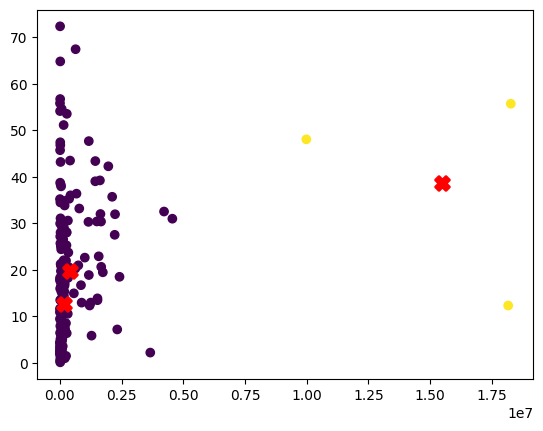

In [853]:
plt.scatter(X.iloc[:, 4], X.iloc[:, 3], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 4], centroids[:, 3], marker='X', s=100, linewidths=2, color='r')
plt.show()


KeyError: ignored

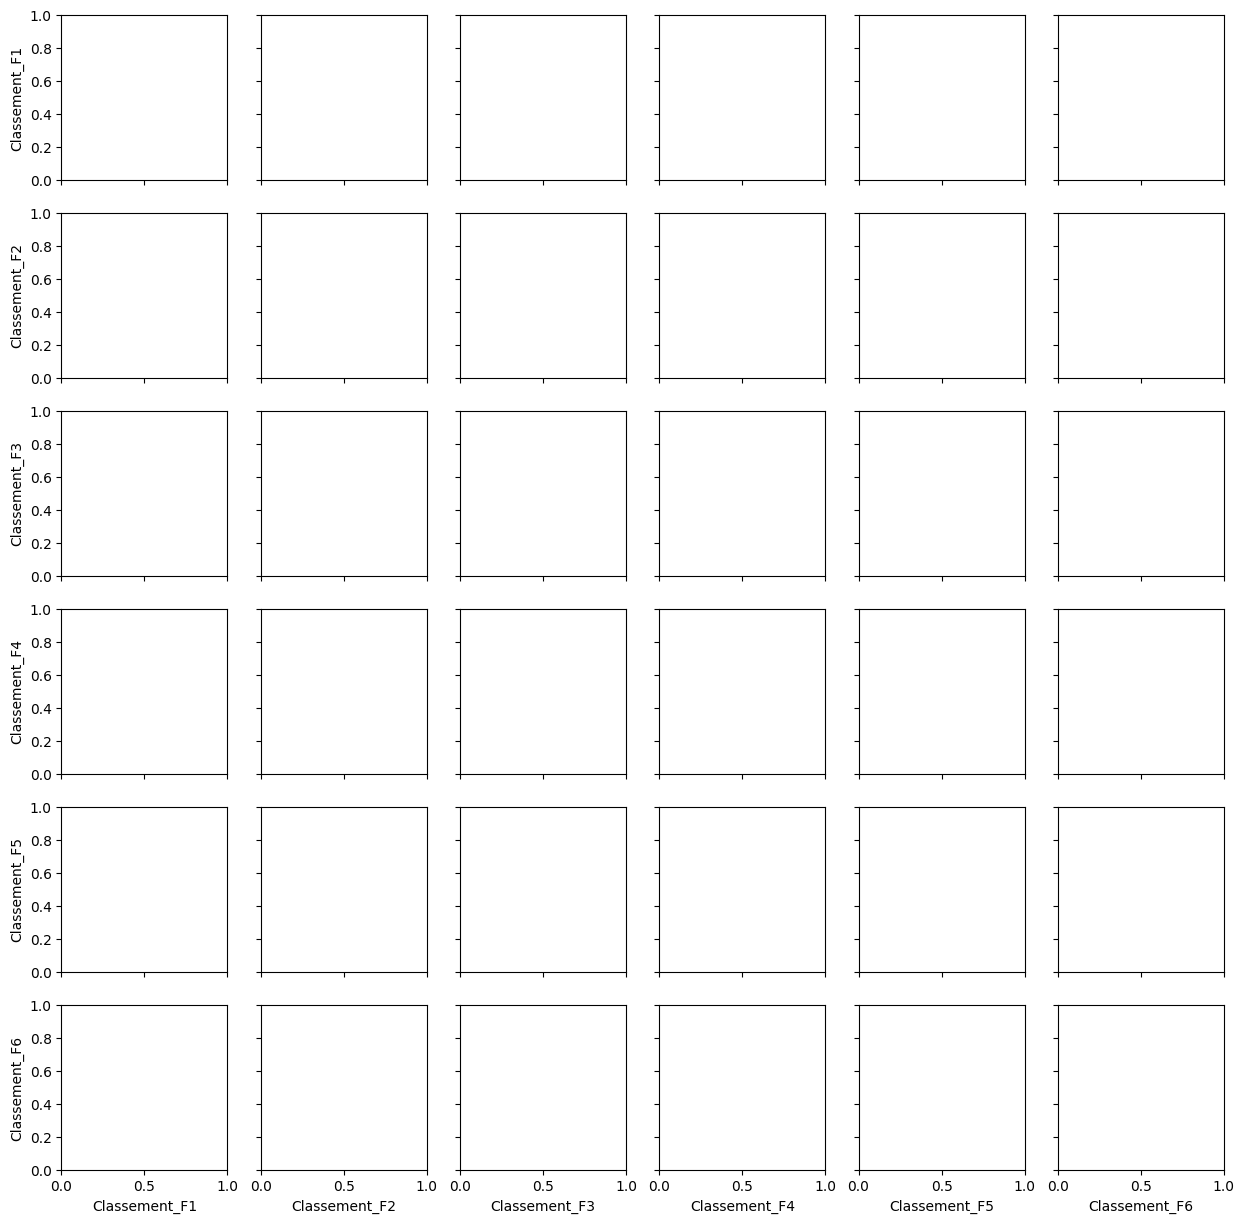

In [867]:
sns.pairplot(X, hue='cluster', palette='viridis')

Analyse et interprétation des clusters

In [855]:
df_classements

,Pays,Classement_F1,Classement_F2,Classement_F3,Classement_F4,Classement_F5,Classement_F6
0,États-Unis d'Amérique,1.0,7.0,122.0,160.0,53.0,164.0
1,"Chine, continentale",2.0,1.0,105.0,17.0,167.0,103.0
2,Brésil,3.0,3.0,3.0,171.0,3.0,87.0
3,Mexique,4.0,90.0,123.0,5.0,169.0,2.0
4,Fédération de Russie,5.0,74.0,54.0,71.0,156.0,36.0
...,...,...,...,...,...,...,...
166,Éthiopie,167.0,13.0,50.0,35.0,78.0,77.0
167,Afghanistan,168.0,2.0,102.0,6.0,159.0,141.0
168,République centrafricaine,169.0,5.0,20.0,66.0,33.0,21.0
169,Tchad,170.0,10.0,29.0,88.0,25.0,17.0


In [856]:
Xpc=df_classements
Xpca=df_classements[['Classement_F1','Classement_F2','Classement_F3','Classement_F4','Classement_F5','Classement_F6']]

In [857]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xpca)
inertia.append(kmeans.inertia_)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [858]:
Xpc["cluster"] = kmeans.labels_

In [859]:
Xpc.set_index('Pays', inplace=True)
Xpc

,Classement_F1,Classement_F2,Classement_F3,Classement_F4,Classement_F5,Classement_F6,cluster
Pays,,,,,,,
États-Unis d'Amérique,1.0,7.0,122.0,160.0,53.0,164.0,2
"Chine, continentale",2.0,1.0,105.0,17.0,167.0,103.0,0
Brésil,3.0,3.0,3.0,171.0,3.0,87.0,2
Mexique,4.0,90.0,123.0,5.0,169.0,2.0,1
Fédération de Russie,5.0,74.0,54.0,71.0,156.0,36.0,1
...,...,...,...,...,...,...,...
Éthiopie,167.0,13.0,50.0,35.0,78.0,77.0,0
Afghanistan,168.0,2.0,102.0,6.0,159.0,141.0,0
République centrafricaine,169.0,5.0,20.0,66.0,33.0,21.0,0


In [860]:
#affichage des clusters trouvés
cluster0 = Xpc[Xpc['cluster'] == 0].index
cluster1 = Xpc[Xpc['cluster'] == 1].index
cluster2 = Xpc[Xpc['cluster'] == 2].index
print("Cluster '0' data:")
print(cluster0)

print("\nCluster '1' data:")
print(cluster1)

print("\nCluster '2' data:")
print(cluster2)

nb0 = (Xpc['cluster'] == 0).sum()
nb1 = (Xpc['cluster'] == 1).sum()
nb2 = (Xpc['cluster'] == 2).sum()

print("Nombre d'éléments dans le cluster '0':", nb0)
print("Nombre d'éléments dans le cluster '1':", nb1)
print("Nombre d'éléments dans le cluster '2':", nb2)

Cluster '0' data:
Index(['Chine, continentale', 'Thaïlande', 'Indonésie', 'Philippines',
       'Myanmar', 'Viet Nam', 'Pérou', 'Égypte', 'Oman', 'Guatemala',
       'Pakistan', 'Kazakhstan', 'Venezuela (République bolivarienne du)',
       'Nicaragua', 'Angola', 'El Salvador', 'Équateur', 'Namibie', 'Honduras',
       'Botswana', 'Azerbaïdjan', 'Sri Lanka', 'Tunisie',
       'République démocratique populaire lao', 'Ghana', 'Eswatini', 'Lesotho',
       'Algérie', 'Liban', 'Malawi', 'Paraguay', 'Mozambique', 'Haïti',
       'Mongolie', 'Kirghizistan', 'Turkménistan', 'Zambie', 'Timor-Leste',
       'Tadjikistan', 'Zimbabwe', 'Sénégal', 'Madagascar', 'Yémen', 'Rwanda',
       'Sao Tomé-et-Principe', 'Mauritanie', 'Ouganda',
       'République-Unie de Tanzanie', 'Libéria', 'Burkina Faso',
       'Côte d'Ivoire', 'Togo', 'Bangladesh', 'Sierra Leone',
       'République populaire démocratique de Corée', 'Ouzbékistan', 'Guinée',
       'Cambodge', 'Mali', 'Guinée-Bissau', 'Gambie', 'Camero

# Dendrogramme ou classification ascendante hierarchique selon la methode de ward

Dendrograme sur le fichier de base table_fus

In [861]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [862]:
X = df
Z = linkage(X, method="ward")

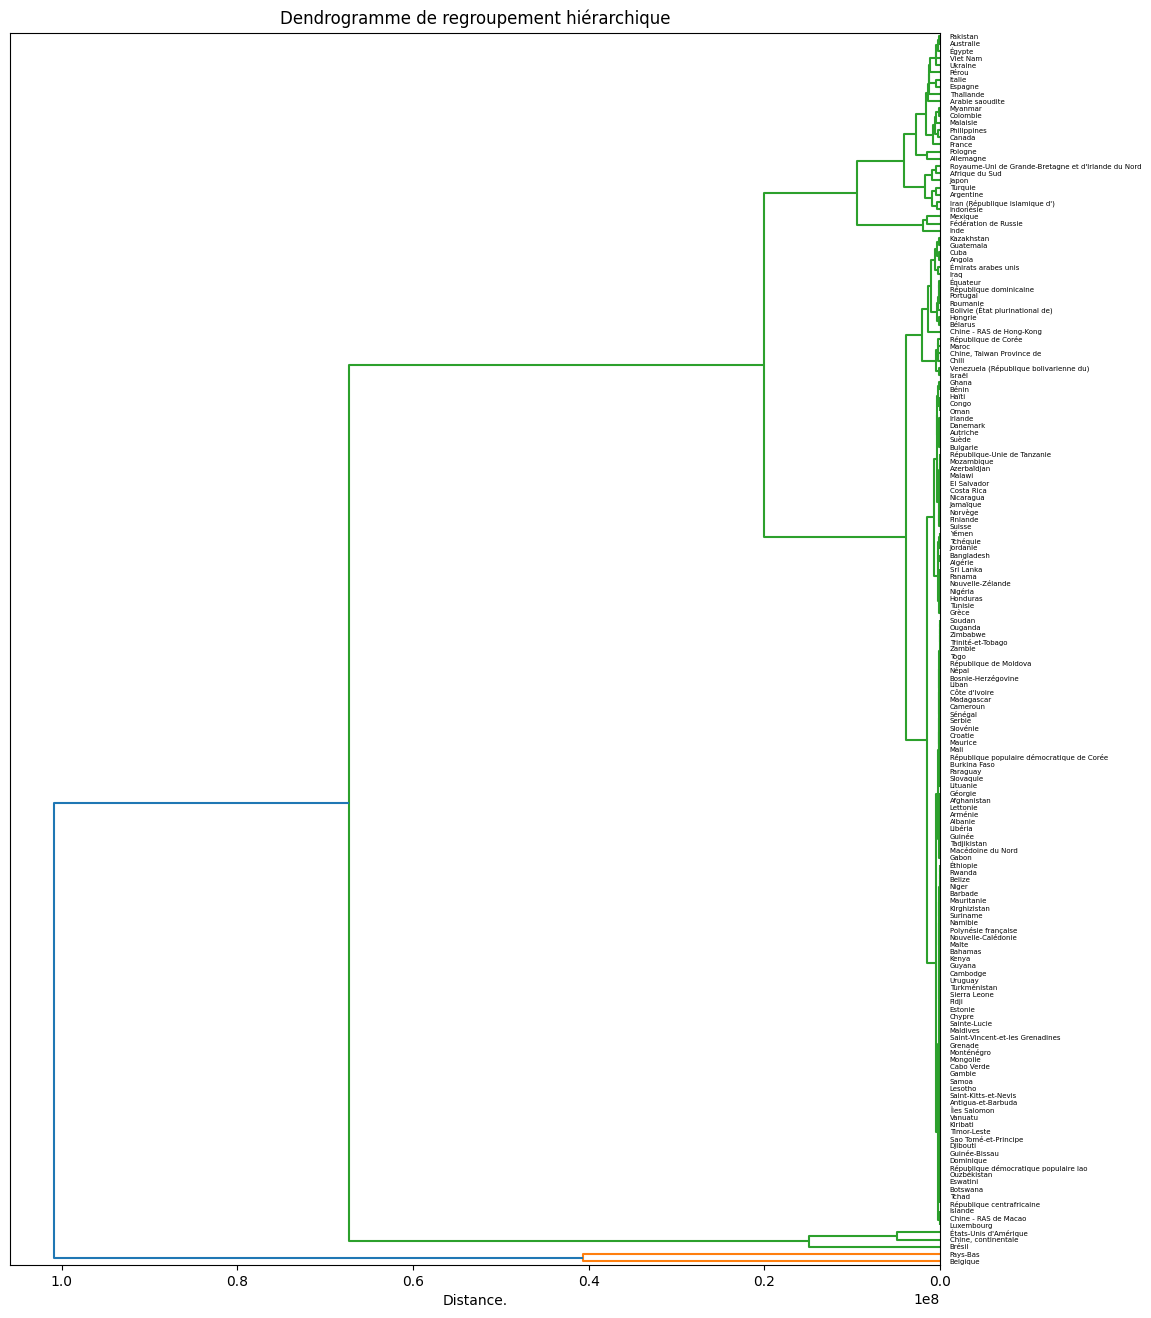

In [863]:
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

_ = dendrogram(Z, labels=df.index, orientation='left') #truncate_mode="lastp"

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Distance.")
#plt.ylabel("Distance.")
plt.show()

on rend le dendrogram plus lisible en se limitant à 3 groupes (idem nombre de cluiuster de kmeans)

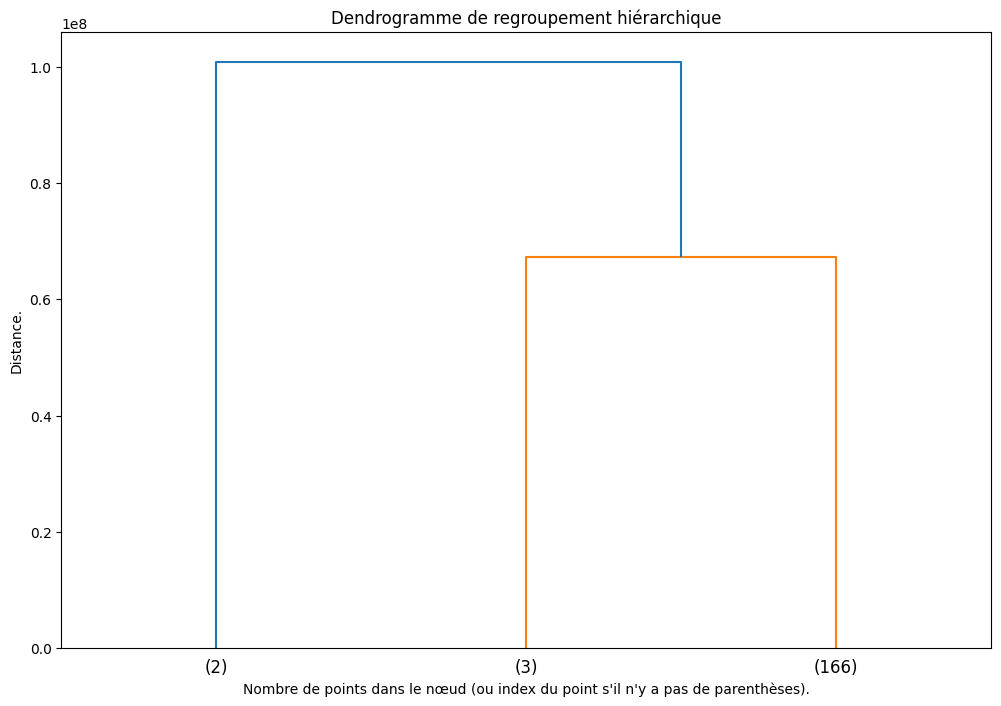

In [864]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=3, truncate_mode="lastp")

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Nombre de points dans le nœud (ou index du point s'il n'y a pas de parenthèses).")
plt.ylabel("Distance.")
plt.show()

Les résultats obtenues sont très cohérents avec ceux du Kmean

Dendrogramme sur la résultante du PCA

In [865]:
X = df_classements[['Classement_F1','Classement_F2','Classement_F3','Classement_F4','Classement_F5','Classement_F6']]
Z = linkage(X, method="ward")

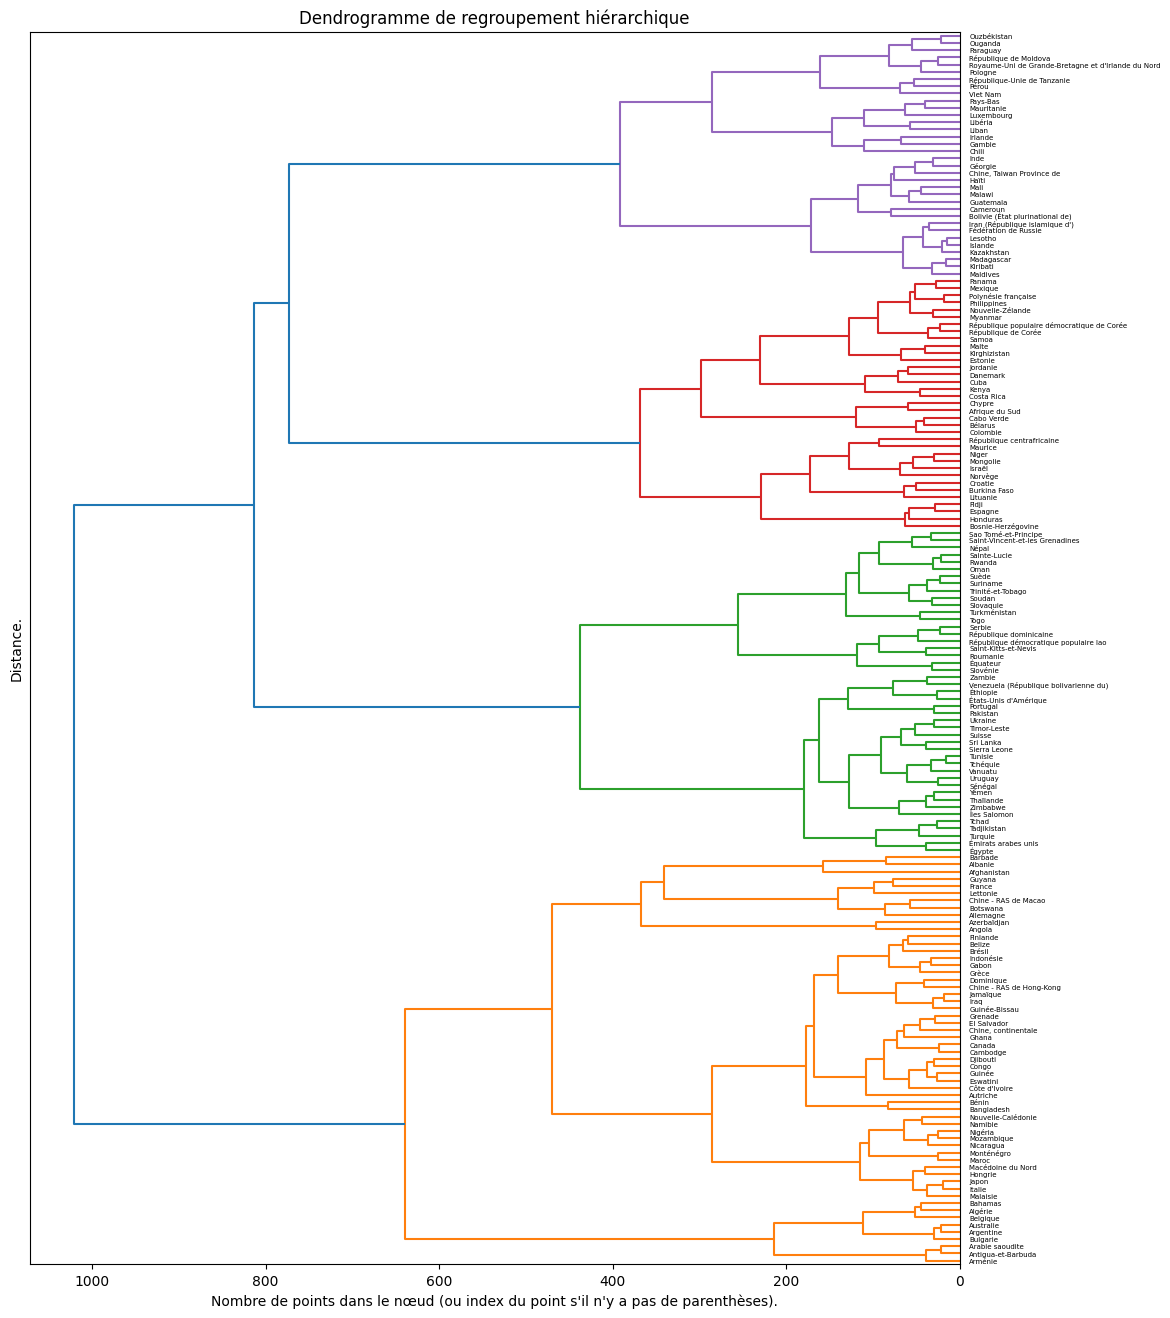

In [866]:
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

_ = dendrogram(Z, labels=df.index, orientation='left') #truncate_mode="lastp"

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Nombre de points dans le nœud (ou index du point s'il n'y a pas de parenthèses).")
plt.ylabel("Distance.")
plt.show()